<h1>TALLER 4</h4>

<h3>Punto 1</h3>

Implemente un método que retorne la subsecuencia común más larga (SCL) apartir de la matriz C construida por el algoritmo de PD que calcula la longitud de la SCL.

In [1]:
import numpy as np

global C

def lcs(X,Y):
    global C
    C = np.ones((len(X)+1,len(Y)+1))*-1
    lcs3(X,Y,len(X),len(Y))
    return C[len(X),len(Y)], C
    

def lcs3(x,y,i,j):
    global C
    if C[i,j] == -1:
        if i == 0 or j == 0:
            C[i,j] = 0
        else:
            if x[i-1]==y[j-1]:
                C[i,j] = lcs3(x,y,i-1,j-1)+1
            else:
                C[i,j] = max(lcs3(x,y,i-1,j),lcs3(x,y,i,j-1))
                
    return C[i,j]

In [2]:
def print_word(mat, X):
    count = 1
    l = []
    for i in range(1, len(mat)):
        for j in range(1, len(mat[0])):
            if count == mat[i,j]:
                l.append(X[j-1])
                count = count+1
    return l

In [3]:
word1 = 'ABC'
word2 = 'AWBDC'
len_lcs, lcs_mat = lcs(word1, word2)
word_list = print_word(lcs_mat, word2)
print "MATIRZ:"
print lcs_mat
print "\nCAMINO:"
for i in range(0, len(word_list)):
    print word_list[i]

MATIRZ:
[[ 0. -1.  0.  0.  0. -1.]
 [-1.  1.  1.  1.  1. -1.]
 [-1. -1. -1.  2.  2. -1.]
 [-1. -1. -1. -1. -1.  3.]]

CAMINO:
A
B
C


<h3>Punto 2</h3>

<h4>2.1</h4>

Implemente un método para determinar los cortes que se deben realizar a partir de la solución de PD que encuentra el valor de la solución óptima.

In [4]:
def cut_rodBU(p,n):
    r = [0] * (n+1)
    r[0] = 0
    r2 = [0] * (n+1)
    
    for j in range(1,n+1):
        q = float('-inf')
        for i in range(1,j+1):
            a = p[i-1]
            b = r[j-i]
            if q < a+b:
                l = []
                q=a+b
                l.append(i)
                if r2[j-i] != 0:
                    l = r2[j-i]+l
        r2[j]= l
        r[j] = q
    return r[n], r2[n]

In [5]:
p = [1,5,8,9,10,17,17,20,24,30]
n = 8
cost_min, cut = cut_rodBU(p,n)
print "COSTO MINIMO:"
print cost_min
print "\nCORTE:"
for i in range(0, len(cut)):
    print cut[i]

COSTO MINIMO:
22

CORTE:
6
2


<h4>2.2</h4>

Realice una comparación experimental sistemática de los algoritmos para diferentes valores  de p y de n.

In [6]:
import numpy as np
import random as rnd
import matplotlib.pyplot as pl
import time
%matplotlib inline

class Counter:
    def __init__(self):
        self.steps = 0

    def reset(self):
        self.steps = 0

    def count(self):
        self.steps += 1

    def print_steps(self):
        print "Number of steps =", self.steps

<h4>A) Implementación de arriba hacia abajo con memorización</h4>

In [7]:
def memo_cut_rodTD(p, n, acct):
    r = [-1] * (n+1); acct.count()
    return memo_cut_rodTD_aux(p,n,r, acct)

def memo_cut_rodTD_aux(p,n,r, acct):
    if r[n] >= 0:
        acct.count()
        return r[n]
    if n == 0:
        acct.count()
        q = 0; acct.count()
    else:
        acct.count()
        q = float('-inf'); acct.count()
        for i in range(1,n+1):
            acct.count()
            q = max(q, p[i-1]+memo_cut_rodTD_aux(p,n-i,r, acct)); acct.count()
    r[n]=q; acct.count()
    return q

In [8]:
def updown_analysis(n):
    steps = []
    timeP = []
    acct = Counter()
    for i in range(n):
        p = np.random.randint(1, 100, (1, i)).tolist()[0]
        acct.reset()
        
        tic = time.clock()
        memo_cut_rodTD(p, i, acct)
        toc = time.clock()
        timeP.append(toc - tic)
        steps.append(acct.steps)
        
    results = [steps, timeP]
    return results

Rojo -> Tiempo

Azul -> Pasos

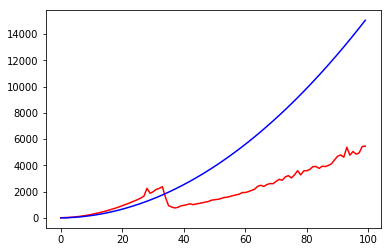

In [9]:
pl.clf()
res = updown_analysis(100)
x = np.arange(100)
y1 = np.array(res[1]) * 1000000
y2 = np.array(res[0])

pl.plot(x, y1, 'r', y2, 'b')

<h4>B) Implementación abajo hacia arriba (bottom-up) con memorización</h4>

In [10]:
def memo_cut_rodBU(p,n,acct):
    r = [0] * (n+1); acct.count()
    r[0] = 0; acct.count()
    for j in range(1,n+1):
        acct.count()
        q = float('-inf'); acct.count()
        for i in range(1,j+1): 
            acct.count()
            q = max(q, p[i-1]+r[j-i]); acct.count()
        r[j] = q; acct.count()
    return r[n]

Para mostrar la gráfica:

In [11]:
def downup_analysis(n):
    steps = []
    timeP = []
    acct = Counter()
    for i in range(n):
        p = np.random.randint(1, 100, (1, i)).tolist()[0]
        acct.reset()
        
        tic = time.clock()
        memo_cut_rodBU(p, i, acct)
        toc = time.clock()
        timeP.append(toc - tic)
        steps.append(acct.steps)
        
    results = [steps, timeP]
    return results

Rojo -> Tiempo

Azul -> Pasos

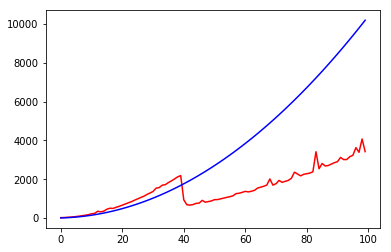

In [12]:
pl.clf()
res = downup_analysis(100)
x = np.arange(100)
y1 = np.array(res[1]) * 1000000
y2 = np.array(res[0])

pl.plot(x, y1, 'r', y2, 'b')

<h3>Punto 3</h3>

Implemente, describa y analice un algoritmo de PD para calcular la distancia de edición entre dos cadenas.

<h4>Descripción y Análisis:</h4>

Para calcular la distancia de edición, se usó la distancia de Levenshtein donde se revisa tres posibles casos: sustitución de un caracter, eliinación, y adición. El código revisa cual de los tres casos es el mínimo costo y lo añade a la matriz del costo. Cuando termina la iteraciones, la última celda es el costo real de la distancia entre las dos palábras. Para este código se tiene la complejidad es de $O(n^2)$. 

<h4>Implementación:</h4>

In [22]:
def levenshtein(word1, word2):
    cost = 0
    size1 = len(word1)
    size2 = len(word2)
    m = np.empty((size1+1, size2+1))
    
    for i in range(0, size1+1):
        m[i,0] = i
        
    for i in range(1, size2+1):
        m[0,i] = i
    
    for i in range(1, size1+1):
        for j in range(1, size2+1):
            if word1[i-1] == word2[j-1]:
                cost = 0
            else:
                cost = 1
            menor = min(m[i-1,j] + 1, m[i,j-1] + 1)
            m[i,j] = min(menor, m[i-1,j-1]+cost)
            
    return m[size1, size2]

In [26]:
word1 = "hola"
word2 = "caracola"
print levenshtein(word1, word2)

5.0


<h3>Punto 4</h3>

En el rio atrato hay n embarcaderos, en cada uno de ellos se puede alquilar un bote para realizar un viaje rio abajo a otro embarcadero. Existe una tabla de tarifas que indica el costo del viaje del embarcadero i al j, para i, j = 1,2,...,n  (i<j), puede pasar que un viaje de i a j sea más caro que una serie de viajes sucesivos intermedios, no hay un costo asociado a cambiar de bote en algún embarcadero. El problema consiste en diseñar un algoritmo de PD que determine el costo mínimo para cada par de puntos i,j.

In [159]:
def start(source, dest, n, mat):
    c = np.zeros((n, n))
    for i in range(1, n):
        for j in range(1, n):
            print i, n
            c[i,j] = cost_menor(i,j,n,mat,c)
    return c

def cost_menor(source, dest, n, mat, c):
    print source+1, n
    cont = float('inf')
    for i in range(source+1, n):
        #print "MAT: ",  mat[source,i] + c[i,dest]
        print "\n"
        cont = min(cont, mat[source,i]+c[i,dest])
    return cont